In [42]:
import pandas as pd
import numpy as np

nba = pd.read_csv("nba_2013.csv")

In [43]:
#Part of dataquest.io's KMeans clustering mission
#https://www.dataquest.io/mission/96/k-means-clustering

In [44]:
point_guards = nba[nba["pos"]=='PG']

In [45]:
point_guards['ppg'] = point_guards['pts'] / point_guards['g']

# Sanity check, make sure ppg = pts/g
point_guards[['pts', 'g', 'ppg']].head(5)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,pts,g,ppg
24,930,71,13.098592
29,150,20,7.500000
30,660,79,8.354430
38,666,72,9.250000
50,378,55,6.872727


In [46]:
point_guards = point_guards[point_guards['tov'] != 0]
point_guards["atr"] = point_guards["ast"] /point_guards["tov"]

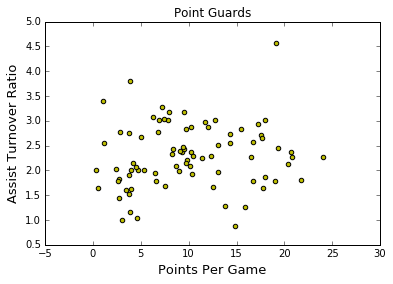

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)

In [48]:
num_clusters = 5
# Use numpy's random function to generate a list, length: num_clusters, of indices
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)
# Use the random indices to create the centroids
centroids = point_guards.loc[random_initial_points]

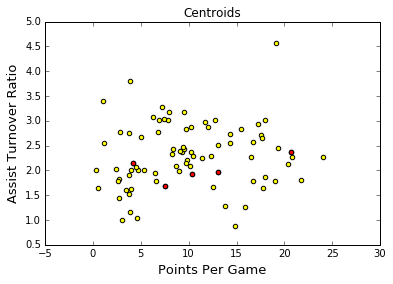

In [49]:
import matplotlib.pyplot as plt
plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)

In [50]:
def centroids_to_dict(centroids):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)

In [51]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5, 2]
p = [3,1]

# Sqrt(5) = ~2.24
#print(calculate_distance(q, p))

In [52]:
print centroids_dict

{0: [20.670731707317074, 2.3678756476683938], 1: [13.0875, 1.9702380952380953], 2: [10.386363636363637, 1.9310344827586208], 3: [7.5, 1.6842105263157894], 4: [4.133333333333334, 2.142857142857143]}


In [53]:
# Uncomment when ready
def assign_to_cluster(row):
    dict_list = []
    lowest = 10000
    closest_key =-1
    for k,v in centroids_dict.iteritems():
#         print v       
#        print type(v)
#        print type([(point_guards["ppg"],point_guards["atr"])])
        t = calculate_distance(v, (row["ppg"],row["atr"]))
        if t < lowest:
            lowest = t
            closest_key = k
            
    return closest_key
    
        
        

    
#for i,r in point_guards.iterrows():
#    assign_to_cluster(r)

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

In [54]:
nba["pos"].value_counts()

SG    109
SF     99
PF     96
C      90
PG     85
F       1
G       1
Name: pos, dtype: int64

In [56]:
%matplotlib
from pandas.tools.plotting import scatter_matrix
#this is slow
mypos = ["SG","SF","PF","C","PG"]
for p in mypos:
    scatter_matrix(nba[nba["pos"]==p],figsize=[10,10],marker='.',s=2)
    myfile = p + ".eps"
    plt.savefig(myfile, format='eps', dpi=600)


Using matplotlib backend: MacOSX
